# 6.1 - Taking the Human Out of the Loop

Author: Jaan Tollander de Balsch

In [1]:
from functools import partial

import matplotlib.pyplot as plt
import numpy as np
from GPyOpt.methods import BayesianOptimization

In [2]:
def f(x):
    return (2*x-2)**2 * np.cos(5*x-4)**2 + 2*x**2

In [3]:
def f_noisy(x, s=0.1):
    return f(x) + s * np.random.randn()

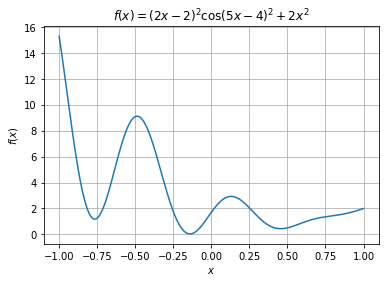

In [4]:
plt.figure()
x = np.linspace(-1, 1, 1000)
plt.plot(x, f(x))
plt.title(r"$f(x)=(2x-2)^2 \cos(5x-4)^2 + 2x^2$")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.grid()
plt.show()

---

Bayesian optimization of function $f(x)$ for $15$ iterations. The Acquisition function and the surrogate functions are plotted in each iteration.

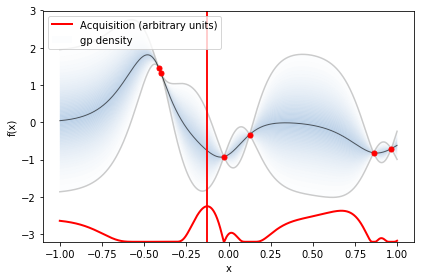

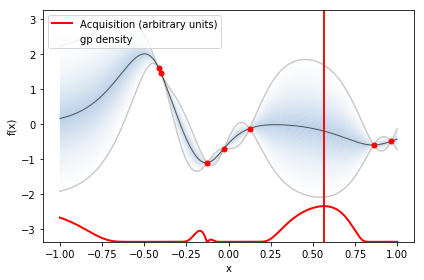

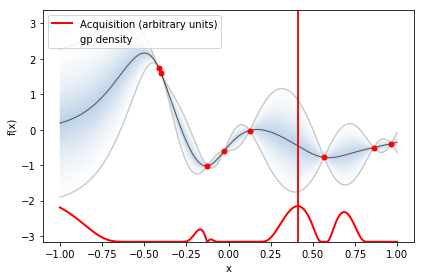

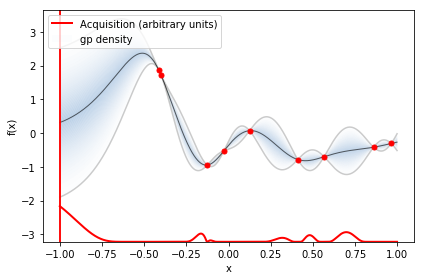

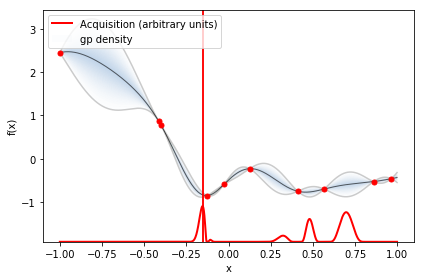

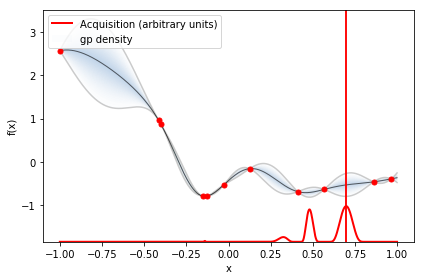

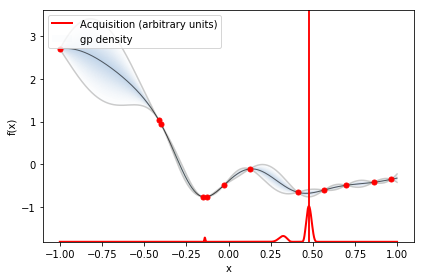

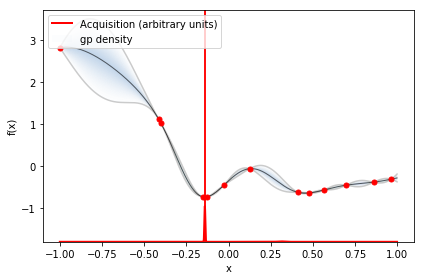

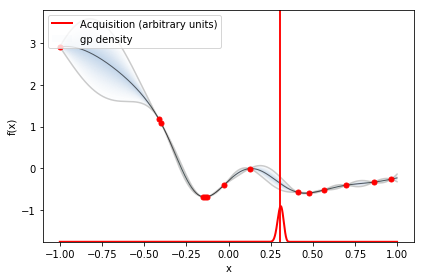

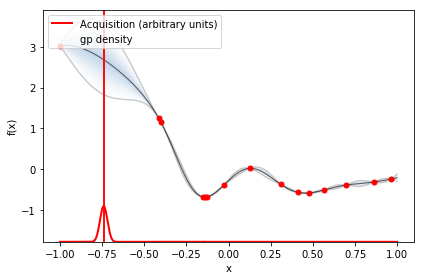

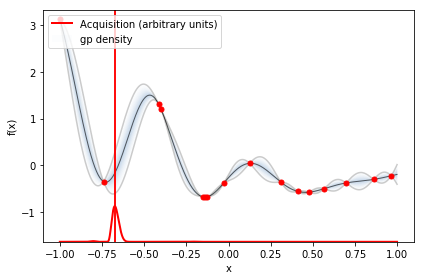

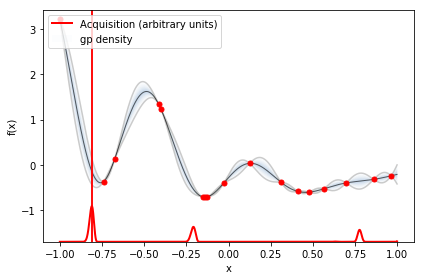

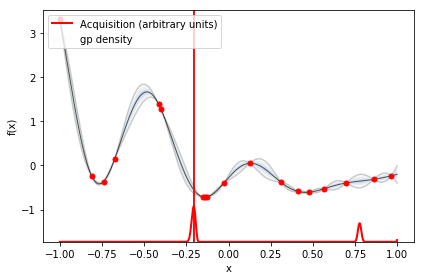

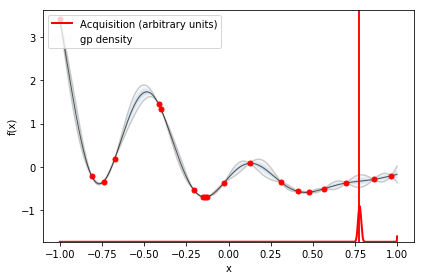

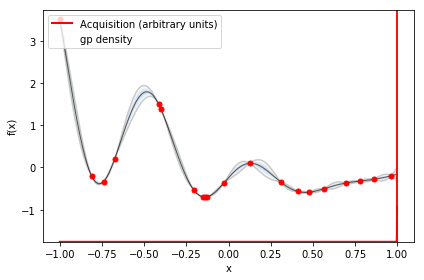

In [5]:
domain = [{'name': 'x', 'type': 'continuous', 'domain': (-1, 1)}]
opt = BayesianOptimization(f, domain=domain, exact_feval=True)
for _ in range(15):
    opt.run_optimization(max_iter=1)
    opt.plot_acquisition()

The result of the optimization $x_{opt}$ and $f(x_{opt})$.

In [6]:
opt.x_opt, opt.fx_opt

(array([-0.14036374]), 0.03998512966482791)

The Bayesian optimization in the case of where the function evaluation are exact, seems to work well and converge relatively fast.

---

Bayesian optimization of the function $f(x)+\epsilon$ where $\epsilon$ is Gaussian noise with standard deviation of $s$. The acquisition plots and the result of the optimization $x_{opt}$ and $f(x_{opt}+s)$ for $s\in\{0.1,0.2,0.3,0.4,0.5\}$ are shown here.

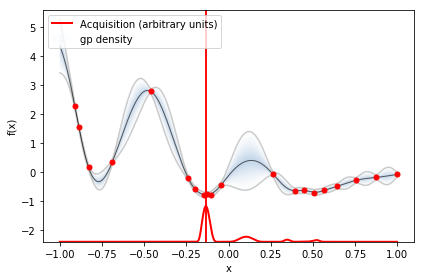

[-0.14477035] 0.1092444272423843


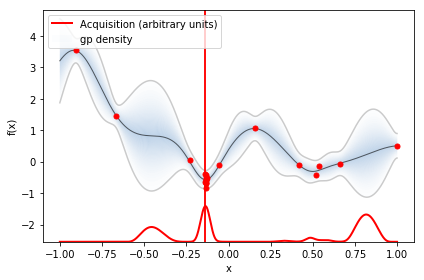

[-0.13536522] -0.35111791947279075


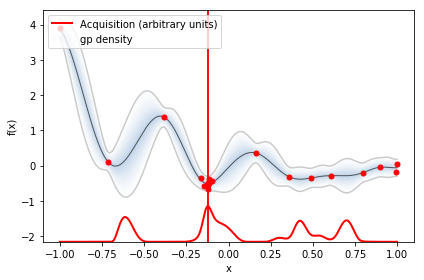

[-0.12226174] -0.36362248773194017


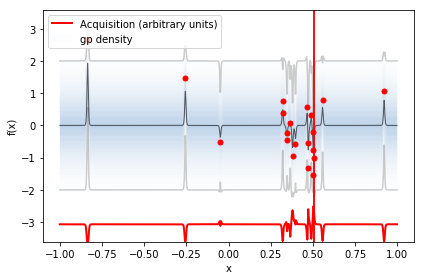

[0.50255977] -0.1333221420999844


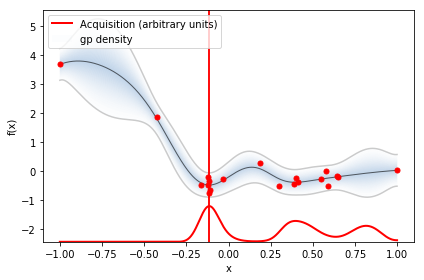

[-0.11429923] -0.2986516283435745


In [9]:
domain = [{'name': 'x', 'type': 'continuous', 'domain': (-1, 1)}]
for s in [0.1, 0.2, 0.3, 0.4, 0.5]:
    opt = BayesianOptimization(partial(f_noisy, s=s), domain=domain, exact_feval=False)
    opt.run_optimization(max_iter=15)
    opt.plot_acquisition()
    print(opt.x_opt, opt.fx_opt)

As the standard devition of the noise increases, the error of the optimal values increases given if same number of iterations are used. Regardless, Bayesian optimization is quite robust against the effect of the noise and the optimal values are not too far off even with higher noise. To obtain better results with higher noise the amount of iterations used should be increased.